In [3]:
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
#Re-Load the dataset
loaded_data = np.load("my_dataset_2.npz", allow_pickle=True)

# Access images and labels
loaded_images = loaded_data['images']

# Now you can use loaded_images and loaded_labels in your code
image_df=pd.DataFrame(loaded_images)
image_df


,0,1,2,3,4,5,6,7,8,9,...,51520,51521,51522,51523,51524,51525,51526,51527,51528,51529
0,47,47,45,45,47,46,48,45,44,46,...,10,11,11,8,10,11,12,10,11,106523337.jpg
1,255,255,254,254,255,254,255,255,255,253,...,254,254,254,254,255,255,255,255,255,1075391489.jpg
2,86,88,88,86,84,88,93,95,96,97,...,2,2,2,2,1,1,1,1,1,108232382.jpg
3,51,52,54,56,58,59,61,62,63,65,...,24,27,31,34,38,41,43,40,38,108232417.jpg
4,131,123,107,88,73,65,60,59,61,62,...,95,91,88,84,82,79,76,74,71,109950015.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,136,150,168,156,158,152,160,155,159,155,...,164,168,163,162,163,163,167,167,161,882748860.jpg
1075,102,179,163,104,38,24,27,26,27,27,...,11,11,11,6,100,64,114,77,100,89201664.jpg
1076,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,96668817.jpg
1077,52,51,57,51,56,59,54,57,59,55,...,38,38,40,42,35,35,35,35,37,98498585.jpg


In [5]:
#load info about images
images_info=pd.read_csv(r"C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\unzipped\flickr_logos_27_dataset\flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+', header=None)
#renaming the columns correspondingly:
new_column_names = ['Image ID', 'Label', 'Subset', 'x1', 'y1','x2', 'y2']
images_info.columns=new_column_names

merged_df = pd.merge(image_df, images_info, left_on=51529, right_on='Image ID', how='inner')
images_full=merged_df.drop(51529, axis=1)

#split it into features and labels
features = images_full.iloc[:, :51529]
labels = images_full.iloc[:, 51530]
labels_coded=images_full.iloc[:,51531]

In [6]:
#split into 80% training+validation files+labels, and 20 % test files+labels
X_train ,X_test, y_train, y_test=train_test_split(features, labels_coded, test_size=0.2, random_state=42)

X_train=X_train/255.0
X_test=X_test/255.0

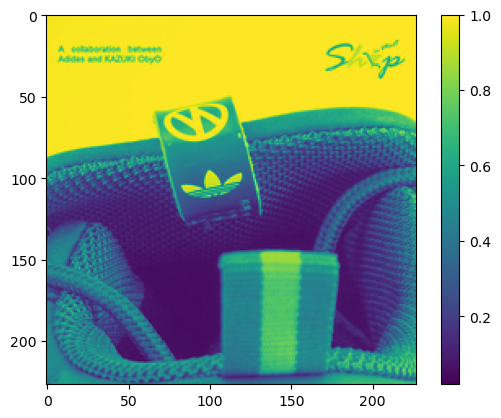

In [63]:
import matplotlib.pyplot as plt

#just plot one image to check if the pixels get stacked correctly
one_pic = X_train.iloc[20]
one_pic_array = one_pic.values.astype(float)  # Convert to float
one_pic_image = one_pic_array.reshape((227, 227))

plt.figure()
plt.imshow(one_pic_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
def image_reshape(image_df):
    images = []
    for idx, row in image_df.iterrows():
        one_pic_array = row.values.astype(float)
        one_pic_image = one_pic_array.reshape((227, 227))
        images.append(one_pic_image)
    return np.array(images)

reshaped_images = image_reshape(X_train)
reshaped_images.shape

(3628, 227, 227)

In [8]:
X_train_reshaped = np.array(reshaped_images, dtype=np.float32)
y_train=np.array(y_train, dtype=np.float32)

# Reshape the input images to include the channel dimension
reshaped_images_array = np.expand_dims(X_train_reshaped, axis=-1)
reshaped_images_array = np.tile(reshaped_images_array, (1, 1, 1, 3))
reshaped_images_array.shape

(3628, 227, 227, 3)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization

cnn_model_1 = Sequential()

# Convolutional layers with Batch Normalization
cnn_model_1.add(Conv2D(kernel_size=(3, 3), filters=64, input_shape=(227, 227, 3), activation='relu'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_1.add(Conv2D(kernel_size=(3, 3), filters=128, activation='relu'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_1.add(Conv2D(kernel_size=(3, 3), filters=256, activation='relu'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
cnn_model_1.add(Dropout(0.5))

# Global average pooling layer
cnn_model_1.add(GlobalAveragePooling2D())

# Output layer
cnn_model_1.add(Dense(27, activation='softmax'))

cnn_model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 225, 225, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 128)     73856     
                                                                 
 batch_normalization_1 (Bat  (None, 110, 110, 128)     512       
 chNormalization)                                                
                                                      

In [16]:
#Compile the model 
cnn_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model for 100 epochs
H = cnn_model_1.fit(reshaped_images_array, y_train, epochs=5, verbose=1)

#After training, load the model with the minimal error on the validation set
#cnn_model.load_weights('saved_keras_models/weights.best.CNN.hdf5')

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\EmiliaGachowetz-Gepp\AppData\Local\Temp\ipykernel_13224\1847060634.py", line 5, in <module>

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [18432,33] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_9678]

https://medium.com/twodigits/classifying-logos-in-images-with-convolutionary-neural-networks-cnns-in-keras-21f02fcea5c2

In [1]:
reshaped_test_images = image_reshape(X_test)
X_test_reshaped = np.array(reshaped_test_images, dtype=np.float32)
y_test=np.array(y_test, dtype=np.float32)

# Reshape the input images to include the channel dimension
reshaped_images_test = np.expand_dims(X_test_reshaped, axis=-1)
reshaped_images_test = np.tile(reshaped_images_test, (1, 1, 1, 3))

cnn_model.evaluate(reshaped_images_test, y_test)

NameError: name 'image_reshape' is not defined